<p style="text-align:center">
    <a href="https://www.linkedin.com/in/abouattara/" target="_blank">
    <img src="https://abouattara.alwaysdata.net/tips_day8_intro.png" width="1000" alt="Get started with python and jupyter notebook">
    </a>
</p>

**For this notebook, let's focus on exploratory data analysis (EDA) with Python** using social media addiction data from kaggle.



<div style="border:2px solid #4F8EF7; border-radius:8px; padding:16px; background-color:#F5F9FF; margin:10px 0;">
    <strong>Let's load all required packages</strong>
</div>

In [45]:
# Import necessary libraries
import kagglehub
import os
import pandas as pd # for data manipulation
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for statistical data visualization
import warnings
warnings.filterwarnings('ignore')

<div style="border:2px solid #4F8EF7; border-radius:8px; padding:16px; background-color:#F5F9FF; margin:10px 0;">
    <strong>Let's download the latest version of data from kaggle</strong>
</div>

In [46]:

# Download latest version
path = kagglehub.dataset_download("adilshamim8/social-media-addiction-vs-relationships")

## Data loading and visualisation

Looking for the file downloaded and load it with `pd.read_csv`

In [47]:
import os
# Find the first CSV file in the downloaded dataset directory
for file in os.listdir(path):
    if file.endswith('.csv'):
        data_path = os.path.join(path, file)
        break

# Read the CSV file into a DataFrame
data = pd.read_csv(data_path)
data.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


First, we can visualize database content using `data.info()`.

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

### Categorical variables exploration

This exploration will guide us on the charasteristic of student like `Gender` , `Academic level`, `Country`, `Most used platform`, `Affects academic performance`, `Relationship status`.

In [49]:
# Display summary statistics for categorical columns
categorical_cols = data.select_dtypes(include='object').columns

# A list to hold summary statistics for each categorical column
summary = []

# For each categorical column, calculate unique values, most frequent value, and its frequency
for col in categorical_cols:
    unique_count = data[col].nunique() # Count of unique values in the column
    top = data[col].value_counts().idxmax() # Count most frequent value
    freq = data[col].value_counts().max() # Get the frequency of the most frequent value
    summary.append([col, unique_count, top, freq]) # Append the summary statistics to the list

# Create a DataFrame from the summary list and display it with a caption
summary_df = pd.DataFrame(summary, columns=['Column', 'Unique Values', 'Most Frequent', 'Frequency'])

# Make little adjustments to the DataFrame for better display
display(summary_df.style.set_caption("Summary of Categorical Columns").set_table_styles(
    [{'selector': 'caption', 'props': [('color', 'cyan'), ('font-size', '16px'), ('font-weight', 'bold')]}]
))

,Column,Unique Values,Most Frequent,Frequency
0,Gender,2,Female,353
1,Academic_Level,3,Undergraduate,353
2,Country,110,India,53
3,Most_Used_Platform,12,Instagram,249
4,Affects_Academic_Performance,2,Yes,453
5,Relationship_Status,3,Single,384


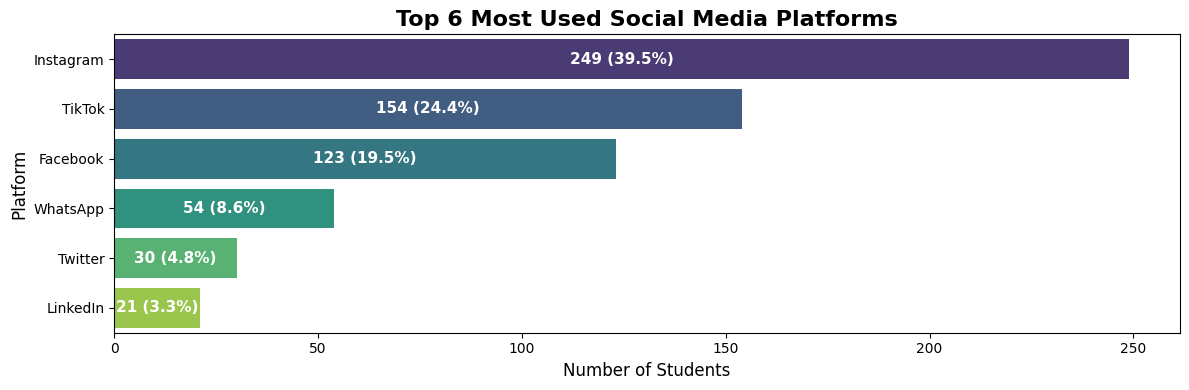

In [50]:
# Focus on 'Most_Used_Platform'
platform_counts = data['Most_Used_Platform'].value_counts().head(6)  # Top 6 platforms

# Make the bar plot
plt.figure(figsize=(12, 4))
ax = sns.barplot(
    y=platform_counts.index,
    x=platform_counts.values,
    palette='viridis'
)
plt.title('Top 6 Most Used Social Media Platforms', fontsize=16, fontweight='bold')
plt.xlabel('Number of Students', fontsize=12)
plt.ylabel('Platform', fontsize=12)

# Add value and percentage labels inside each bar
total = platform_counts.sum()
for i, (count, platform) in enumerate(zip(platform_counts.values, platform_counts.index)):
    percent = count / total * 100
    ax.text(
        count / 2, i, f'{count} ({percent:.1f}%)',
        va='center', ha='center', fontsize=11, color='white', fontweight='bold'
    )

plt.tight_layout()
plt.show()

**Key Insights from the Categorical Data:**

- **Gender:** Female students are the most represented, making up **50.1%** of the sample.
- **Academic Level:** The majority are **undergraduates** (**50.1%**).
- **Relationship Status:** Over half of the students are **single** (**54.5%**).
- **Country:** The largest group of students comes from **India** (**7.5%**).
- **Most Used Platforms:** The top platforms are:
    - **Instagram** (**35.3%**)
    - **TikTok** (**21.8%**)
    - **Facebook** (**17.4%**)
    - **WhatsApp** (**7.7%**)
- **Academic Performance:** A significant **64.3%** of students report that their academic performance is affected by social media use.

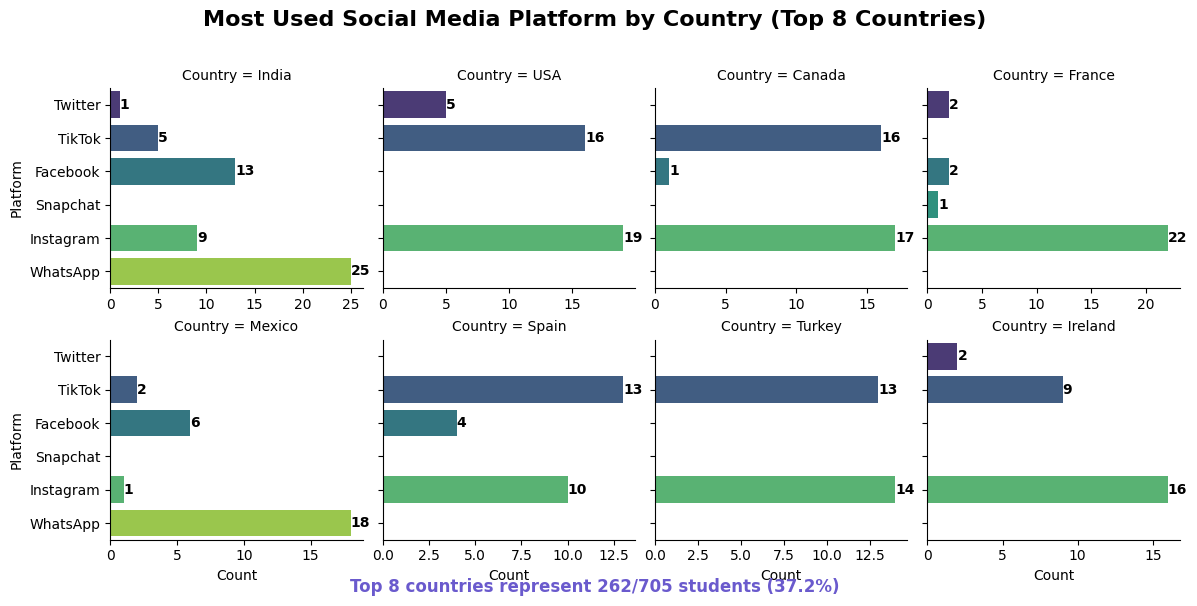

In [51]:
top_countries = data['Country'].value_counts().head(8).index

g = sns.catplot(
    data=data[data['Country'].isin(top_countries)],
    kind='count',
    y='Most_Used_Platform',
    col='Country',
    col_order=top_countries,
    col_wrap=4,
    height=3,
    aspect=1,
    palette='viridis',
    sharex=False
)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Most Used Social Media Platform by Country (Top 8 Countries)', fontsize=16, fontweight='bold')
g.set_axis_labels('Count', 'Platform')

# Add value labels to each bar
for ax in g.axes.flatten():
    for p in ax.patches:
        width = p.get_width()
        if width > 0:
            ax.text(width, p.get_y() + p.get_height() / 2, int(width),
                    va='center', ha='left', fontsize=10, color='black', fontweight='bold')

# Calculate and display the percent of students in top 8 countries
n_top8 = data[data['Country'].isin(top_countries)].shape[0]
n_total = data.shape[0]
percent_top8 = n_top8 / n_total * 100
plt.figtext(0.5, 0.01, f"Top 8 countries represent {n_top8}/{n_total} students ({percent_top8:.1f}%)",
            ha='center', fontsize=12, color='slateblue', fontweight='bold')

plt.show()


After visualizing students' social media usage trends, let's proceed to explore the continuous variables.


In [52]:
# Retrieve continuous columns
continuous_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Summary statistics for continuous columns
cont_summary = data[continuous_cols].describe(percentiles=[.25, .5, .75]).T
cont_summary = cont_summary.rename(columns={
      '25%': 'Q1',
      '50%': 'Median',
      '75%': 'Q3',
      'mean': 'Mean',
      'std': 'Std',
      'min': 'Min',
      'max': 'Max'
})
cont_summary = cont_summary[['Mean', 'Std', 'Min', 'Q1', 'Median', 'Q3', 'Max']]
display(cont_summary.style.set_caption("Summary of Continuous Columns").set_table_styles(
      [{'selector': 'caption', 'props': [('color', 'cyan'), ('font-size', '16px'), ('font-weight', 'bold')]}]
))


,Mean,Std,Min,Q1,Median,Q3,Max
Student_ID,353.000000,203.660256,1.000000,177.000000,353.000000,529.000000,705.000000
Age,20.659574,1.399217,18.000000,19.000000,21.000000,22.000000,24.000000
Avg_Daily_Usage_Hours,4.918723,1.257395,1.500000,4.100000,4.800000,5.800000,8.500000
Sleep_Hours_Per_Night,6.868936,1.126848,3.800000,6.000000,6.900000,7.700000,9.600000
Mental_Health_Score,6.226950,1.105055,4.000000,5.000000,6.000000,7.000000,9.000000
Conflicts_Over_Social_Media,2.849645,0.957968,0.000000,2.000000,3.000000,4.000000,5.000000
Addicted_Score,6.436879,1.587165,2.000000,5.000000,7.000000,8.000000,9.000000


The average daily social media usage among students is 5 hours. The median age of students is 21, and the median mental health score is 6. On average, students experience around 3 conflicts due to social media use. Most students exhibit signs of social media addiction, with a median addiction score of 7. On average, students get about 7 hours of sleep per night.

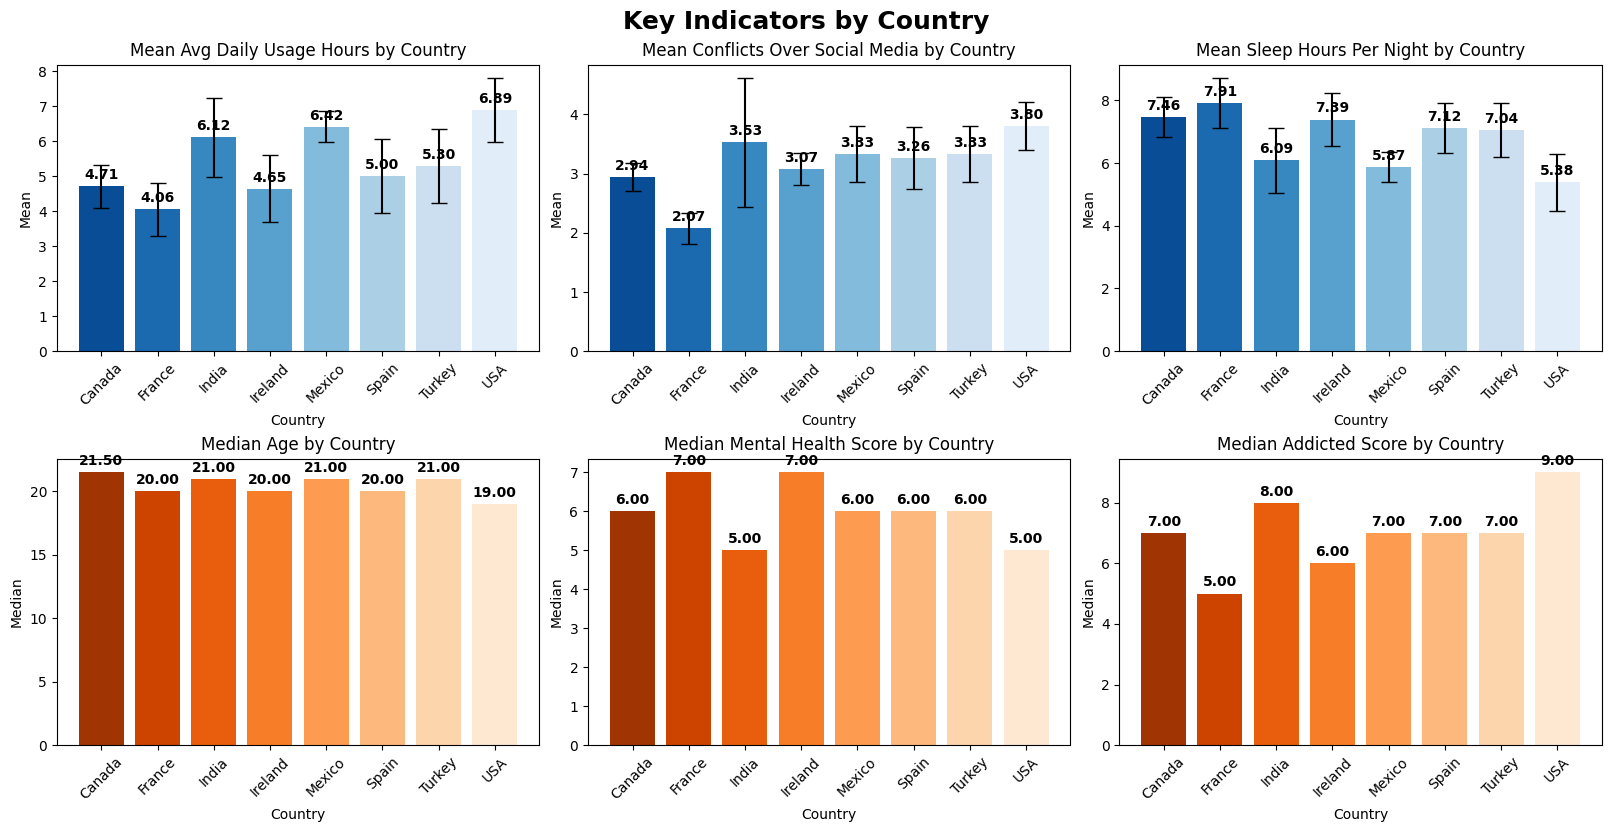

In [53]:

# Select relevant columns for plotting by country
indicatorsMoy = [
    'Avg_Daily_Usage_Hours',
    'Conflicts_Over_Social_Media',
    'Sleep_Hours_Per_Night'
]
indicatorsMed = [
    'Age',
    'Mental_Health_Score',
    'Addicted_Score'
]
country_col = 'Country'

# Calculate mean/median and std for each indicator by country (top 8 countries for clarity)
top_countries = data[country_col].value_counts().head(8).index
country_data = data[data[country_col].isin(top_countries)]

indicator_statsMoy = country_data.groupby(country_col)[indicatorsMoy].agg(['mean', 'std'])
indicator_statsMed = country_data.groupby(country_col)[indicatorsMed].agg(['median'])

n_rows, n_cols = 6, 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 20), constrained_layout=True)
axes_flat = axes.flatten()

# Plot mean for indicatorsMoy with error bars and value labels
for i, indicator in enumerate(indicatorsMoy):
    ax = axes_flat[i]
    means = indicator_statsMoy[(indicator, 'mean')]
    stds = indicator_statsMoy[(indicator, 'std')]
    bars = ax.bar(
        means.index,
        means.values,
        yerr=stds.values,
        capsize=6,
        color=sns.color_palette('Blues_r', len(means))
    )
    ax.set_title(f'Mean {indicator.replace("_", " ")} by Country')
    ax.set_xlabel('Country')
    ax.set_ylabel('Mean')
    ax.tick_params(axis='x', rotation=45)
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Plot median for indicatorsMed with value labels
for j, indicator in enumerate(indicatorsMed):
    idx = len(indicatorsMoy) + j
    ax = axes_flat[idx]
    medians = indicator_statsMed[(indicator, 'median')]
    bars = ax.bar(
        medians.index,
        medians.values,
        color=sns.color_palette('Oranges_r', len(medians))
    )
    ax.set_title(f'Median {indicator.replace("_", " ")} by Country')
    ax.set_xlabel('Country')
    ax.set_ylabel('Median')
    ax.tick_params(axis='x', rotation=45)
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Hide unused axes
for k in range(len(indicatorsMoy) + len(indicatorsMed), n_rows * n_cols):
    axes_flat[k].set_visible(False)

plt.suptitle('Key Indicators by Country', fontsize=18, fontweight='bold')
plt.show()


Students from the USA, Mexico, and India spend more time on social media than those from other countries, averaging 6.89, 6.82, and 6.12 hours per day, respectively. These countries also report lower average sleep duration among students. In contrast, students in Canada and France experience fewer social media-related conflicts, with an average number of conflicts below 3. Students in the USA tend to be younger. Ireland and France have higher median mental health scores (7) and lower addiction scores, indicating better well-being and less social media dependence. Conversely, India and the USA have lower median mental health scores (5) and higher addiction scores, suggesting that increased social media addiction is associated with poorer mental health among students.

## Addictive score modeling

Let's train model on 80 % of data. Here the idea is to train the model on the features to predict addicted score.



In [ ]:
# Si vous êtes dans un notebook Jupyter, décommentez la ligne suivante :
# %pip install --upgrade scipy statsmodels scikit-learn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel


# Définir les variables/features et la cible
features = [
    'Gender', 'Academic_Level', 'Country', 'Most_Used_Platform',
    'Affects_Academic_Performance', 'Relationship_Status',
    'Avg_Daily_Usage_Hours', 'Conflicts_Over_Social_Media',
    'Sleep_Hours_Per_Night', 'Age', 'Mental_Health_Score'
]
target = 'Addicted_Score'

# Supposons que votre DataFrame s'appelle 'data'
# Encodage des variables catégorielles
X = pd.get_dummies(data[features], drop_first=True)
y = data[target]

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical columns for scaling
numerical_cols = [
    'Avg_Daily_Usage_Hours', 'Conflicts_Over_Social_Media',
    'Sleep_Hours_Per_Night', 'Age', 'Mental_Health_Score'
]

# Scale numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


# Convert boolean columns to integers
for col in X_train.columns:
    if X_train[col].dtype == 'bool':
        X_train[col] = X_train[col].astype(int)

for col in X_test.columns:
    if X_test[col].dtype == 'bool':
        X_test[col] = X_test[col].astype(int)


# Define and fit the OrderedModel
# The 'distr' parameter can be 'logit' for Ordered Logit or 'probit' for Ordered Probit
ord_model = OrderedModel(y_train, X_train, distr='logit')

# Try fitting with regularization and a different optimization method
try:
    ord_results = ord_model.fit(method='newton', maxiter=1000, tol=1e-8)
except np.linalg.LinAlgError:
    print("Newton method failed, trying with L-BFGS-B and increased iterations/tolerance.")
    try:
        ord_results = ord_model.fit(method='lbfgs', maxiter=10000, ftol=1e-8, gtol=1e-8)
    except Exception as e:
        print(f"Optimization failed with L-BFGS-B: {e}")
        print("Consider simplifying the model or checking for perfect multicollinearity.")


Optimization terminated successfully.
         Current function value: 44.418663
         Iterations 8
Newton method failed, trying with L-BFGS-B and increased iterations/tolerance.


**Model evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Predict the probabilities for the test set
predicted_probs = ord_results.predict(X_test)

# Get the predicted class (Addicted_Score) with the highest probability
# The columns of predicted_probs correspond to the categories of the target variable.
# We need to get the class label for the highest probability.
# Assuming the classes are the unique values in y_train, sorted.
classes = sorted(y_train.unique())
# Correctly extract the predicted class for each sample by iterating through rows
predicted_categories = [classes[np.argmax(prob)] for prob in predicted_probs.values]


# Evaluate the model
accuracy = accuracy_score(y_test, predicted_categories)
conf_matrix = confusion_matrix(y_test, predicted_categories)
class_report = classification_report(y_test, predicted_categories)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Communicate model results trought an interface
I will create an interactive interface using `ipywidgets` that takes user input for the features used in the linear regression model and outputs the predicted 'Addicted_Score'. The interface should include appropriate widgets for each feature (e.g., dropdowns for categorical features, sliders or text boxes for numerical features).

**Step 1**:
Define a function to predict the addicted score using the trained logit regression model and handle one-hot encoding for categorical features.



In [ ]:
def predict_addicted_score(
    Gender, Academic_Level, Country, Most_Used_Platform,
    Affects_Academic_Performance, Relationship_Status,
    Avg_Daily_Usage_Hours, Conflicts_Over_Social_Media,
    Sleep_Hours_Per_Night, Age, Mental_Health_Score
):
    """
    Predicts the Addicted_Score based on input features using the trained linear regression model.

    Args:
        Gender (str): The gender of the student.
        Academic_Level (str): The academic level of the student.
        Country (str): The country of the student.
        Most_Used_Platform (str): The most used social media platform.
        Affects_Academic_Performance (str): Whether social media affects academic performance ('Yes' or 'No').
        Relationship_Status (str): The relationship status of the student.
        Avg_Daily_Usage_Hours (float): Average daily social media usage hours.
        Conflicts_Over_Social_Media (int): Number of conflicts over social media.
        Sleep_Hours_Per_Night (float): Hours of sleep per Night.
        Age (int): The age of the student.
        Mental_Health_Score (int): The mental health score.

    Returns:
        int: The predicted Addicted_Score (the most likely category).
    """
    # Create a DataFrame from the input parameters
    input_data = pd.DataFrame([{
        'Gender': Gender,
        'Academic_Level': Academic_Level,
        'Country': Country,
        'Most_Used_Platform': Most_Used_Platform,
        'Affects_Academic_Performance': Affects_Academic_Performance,
        'Relationship_Status': Relationship_Status,
        'Avg_Daily_Usage_Hours': Avg_Daily_Usage_Hours,
        'Conflicts_Over_Social_Media': Conflicts_Over_Social_Media,
        'Sleep_Hours_Per_Night': Sleep_Hours_Per_Night,
        'Age': Age,
        'Mental_Health_Score': Mental_Health_Score
    }])

    # Apply one-hot encoding
    input_encoded = pd.get_dummies(input_data, drop_first=True)

    # Reindex to match the training data columns and fill missing with 0
    # Ensure columns are of the same type (int) as X_train
    input_aligned = input_encoded.reindex(columns=X_train.columns, fill_value=0).astype(int)


    # Predict the probabilities for each class using the ordinal model
    predicted_probs = ord_results.predict(input_aligned)

    # Get the predicted class (Addicted_Score) with the highest probability
    # The columns of predicted_probs correspond to the categories of the target variable.
    # We need to get the class label for the highest probability.
    # Assuming the classes are the unique values in y_train, sorted.
    classes = sorted(y_train.unique())
    predicted_score = classes[np.argmax(predicted_probs, axis=1)[0]]


    return predicted_score

**step 2 :**
`ipywidgets` will be used to create interactive elements for each of the input parameters (e.g., dropdowns for categorical variables, sliders or text boxes for numerical variables).


**Reasoning**:
Create ipywidgets for each feature based on their data type and unique values/ranges from the data and cont_summary dataframes.



In [ ]:
# Package import
import ipywidgets as widgets

# Create widgets for categorical features (Dropdown)
gender_widget = widgets.Dropdown(options=data['Gender'].unique().tolist(), description='Gender:')
academic_level_widget = widgets.Dropdown(options=data['Academic_Level'].unique().tolist(), description='Academic Level:')
country_widget = widgets.Dropdown(options=data['Country'].unique().tolist(), description='Country:')
most_used_platform_widget = widgets.Dropdown(options=data['Most_Used_Platform'].unique().tolist(), description='Most Used Platform:')
affects_academic_performance_widget = widgets.Dropdown(options=data['Affects_Academic_Performance'].unique().tolist(), description='Affects Academic Performance:')
relationship_status_widget = widgets.Dropdown(options=data['Relationship_Status'].unique().tolist(), description='Relationship Status:')

# Create widgets for numerical features (FloatSlider/IntSlider)
avg_daily_usage_hours_widget = widgets.FloatSlider(min=cont_summary.loc['Avg_Daily_Usage_Hours', 'Min'],
                                                   max=cont_summary.loc['Avg_Daily_Usage_Hours', 'Max'],
                                                   step=0.1,
                                                   description='Avg Daily Usage Hours:',
                                                   continuous_update=False,
                                                   orientation='horizontal',
                                                   readout=True,
                                                   readout_format='.1f')

conflicts_over_social_media_widget = widgets.IntSlider(min=cont_summary.loc['Conflicts_Over_Social_Media', 'Min'],
                                                       max=cont_summary.loc['Conflicts_Over_Social_Media', 'Max'],
                                                       step=1,
                                                       description='Conflicts Over Social Media:',
                                                       continuous_update=False,
                                                       orientation='horizontal',
                                                       readout=True)

sleep_hours_per_night_widget = widgets.FloatSlider(min=cont_summary.loc['Sleep_Hours_Per_Night', 'Min'],
                                                   max=cont_summary.loc['Sleep_Hours_Per_Night', 'Max'],
                                                   step=0.1,
                                                   description='Sleep Hours Per Night:',
                                                   continuous_update=False,
                                                   orientation='horizontal',
                                                   readout=True,
                                                   readout_format='.1f')

age_widget = widgets.IntSlider(min=cont_summary.loc['Age', 'Min'],
                               max=cont_summary.loc['Age', 'Max'],
                               step=1,
                               description='Age:',
                               continuous_update=False,
                               orientation='horizontal',
                               readout=True)

mental_health_score_widget = widgets.IntSlider(min=cont_summary.loc['Mental_Health_Score', 'Min'],
                                               max=cont_summary.loc['Mental_Health_Score', 'Max'],
                                               step=1,
                                               description='Mental Health Score:',
                                               continuous_update=False,
                                               orientation='horizontal',
                                               readout=True)

**step 3** :
Connect the interactive widgets to the prediction function so that whenever the user changes a widget's value, the prediction function is called with the new values.


**Reasoning**:
Define an output widget and a function to handle widget changes and then link them using `widgets.interactive_output`.



In [ ]:
# Define an output widget to display the prediction result
output_widget = widgets.Output()

# Define the function to call when widget values change
def on_value_change(
    Gender, Academic_Level, Country, Most_Used_Platform,
    Affects_Academic_Performance, Relationship_Status,
    Avg_Daily_Usage_Hours, Conflicts_Over_Social_Media,
    Sleep_Hours_Per_Night, Age, Mental_Health_Score
):
    with output_widget:
        output_widget.clear_output()
        predicted_score = predict_addicted_score(
            Gender, Academic_Level, Country, Most_Used_Platform,
            Affects_Academic_Performance, Relationship_Status,
            Avg_Daily_Usage_Hours, Conflicts_Over_Social_Media,
            Sleep_Hours_Per_Night, Age, Mental_Health_Score
        )
        print(f"Predicted Addicted Score: {predicted_score:.2f}")

# Link the prediction function to the input widgets and the output display
interactive_plot = widgets.interactive_output(
    on_value_change,
    {
        'Gender': gender_widget,
        'Academic_Level': academic_level_widget,
        'Country': country_widget,
        'Most_Used_Platform': most_used_platform_widget,
        'Affects_Academic_Performance': affects_academic_performance_widget,
        'Relationship_Status': relationship_status_widget,
        'Avg_Daily_Usage_Hours': avg_daily_usage_hours_widget,
        'Conflicts_Over_Social_Media': conflicts_over_social_media_widget,
        'Sleep_Hours_Per_Night': sleep_hours_per_night_widget,
        'Age': age_widget,
        'Mental_Health_Score': mental_health_score_widget
    }
)

# Arrange the widgets and the output
input_widgets = widgets.VBox([
    gender_widget,
    academic_level_widget,
    country_widget,
    most_used_platform_widget,
    affects_academic_performance_widget,
    relationship_status_widget,
    avg_daily_usage_hours_widget,
    conflicts_over_social_media_widget,
    sleep_hours_per_night_widget,
    age_widget,
    mental_health_score_widget
])

display(widgets.VBox([input_widgets, output_widget]))



---



## <h3 align="center"> © 2025 - All rights reserved. <h3/>

<!-- # Change Log

| Date (YYYY-MM-DD) | Version | Changed By          | Change Description                 |
| ----------------- | ------- | ------------------- | ---------------------------------- |
| 2025-06-25        | 0.1     |Abdoulaye OUATTARA| Created initial version            |

<hr/> --!>

